In [ ]:
import pandas as pd
import numpy as np

import time
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
car_data_ML = pd.read_csv('germany-used-cars-2023.csv')
car_data_ML.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [ ]:
car_data_ML.sort_values(by='price_in_euro', ascending=False).head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
213235,213235,toyota,Toyota Land Cruiser,white,Automatic,Diesel,sofort verfügbar,"7,6 l/100 km",150,Automatic,01/2023,201 g/km,2023,71860.0,2.8 AT Executive
116348,116348,mercedes-benz,Mercedes-Benz C 63 AMG,black,Automatic,Petrol,s Package PAGA,"8,2 l/100 km",375,Automatic,10/2015,192 g/km,2015,54399.0,C 63 S AMG 510PS AMG Driver&#39
13554,13554,audi,Audi A5,grey,99.900 km,04/2017,amp,121 g/km,"4,6 l/100 km",Automatic,Automatic,2017,Diesel,NaN,Sportback qu S-LINE PANO B&amp
65760,65760,ford,Ford Focus,black,Alu,113.000 km,Winter,Petrol,2017,Manual,12890,03/2017,Manual,NaN,1.0 Eco Boost Titanium
70531,70531,ford,Ford Focus,white,Automatic,Petrol,VOLL LED,"5,9 l/100 km",110,Automatic,03/2019,134 g/km,2019,18990.0,Turnier Titanium AUTOMATIK


In [ ]:
# Lista de colunas para converter para numérico
columns_to_convert = ['price_in_euro', 'year', 'power_ps']

# Loop para converter as colunas e preencher valores nulos
for col in columns_to_convert:
    car_data_ML[col] = pd.to_numeric(car_data_ML[col], errors='coerce')
    car_data_ML[col] = car_data_ML[col].fillna(0)


#criando e tratando a coluna car_age
current_year = datetime.now().year
car_data_ML['car_age'] = current_year - car_data_ML['year']
car_data_ML= car_data_ML[car_data_ML['car_age'] > 0]

car_data_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251075 entries, 0 to 251078
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251075 non-null  int64  
 1   brand                     251075 non-null  object 
 2   model                     251075 non-null  object 
 3   color                     250909 non-null  object 
 4   registration_date         251071 non-null  object 
 5   year                      251075 non-null  float64
 6   price_in_euro             251075 non-null  float64
 7   power_kw                  250941 non-null  object 
 8   power_ps                  251075 non-null  float64
 9   transmission_type         251075 non-null  object 
 10  fuel_type                 251075 non-null  object 
 11  fuel_consumption_l_100km  224202 non-null  object 
 12  fuel_consumption_g_km     251075 non-null  object 
 13  mileage_in_km             250927 non-null  float6

In [ ]:
# Lista de colunas para deletar
columns_to_drop = ['registration_date','year','power_kw',
                   'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'offer_description']

# Deletando as colunas
car_data_ML = car_data_ML.drop(columns=columns_to_drop)

# Exibindo as informações do dataframe para confirmar
car_data_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251075 entries, 0 to 251078
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         251075 non-null  int64  
 1   brand              251075 non-null  object 
 2   model              251075 non-null  object 
 3   color              250909 non-null  object 
 4   price_in_euro      251075 non-null  float64
 5   power_ps           251075 non-null  float64
 6   transmission_type  251075 non-null  object 
 7   fuel_type          251075 non-null  object 
 8   mileage_in_km      250927 non-null  float64
 9   car_age            251075 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.1+ MB


In [ ]:
car_data_ML = car_data_ML[(car_data_ML['model']=='Volkswagen Golf') &\
                          (car_data_ML['power_ps']==150) &\
                          (car_data_ML['transmission_type']=='Manual') &\
                            (car_data_ML['fuel_type']=='Petrol') &\
                          (car_data_ML['car_age']<11)]


In [ ]:
car_data_ML

,Unnamed: 0,brand,model,color,price_in_euro,power_ps,transmission_type,fuel_type,mileage_in_km,car_age
229254,229254,volkswagen,Volkswagen Golf,blue,12370.0,150.0,Manual,Petrol,89972.0,10.0
229276,229276,volkswagen,Volkswagen Golf,blue,12000.0,150.0,Manual,Petrol,154000.0,10.0
229347,229347,volkswagen,Volkswagen Golf,blue,22499.0,150.0,Manual,Petrol,124000.0,10.0
229456,229456,volkswagen,Volkswagen Golf,blue,15790.0,150.0,Manual,Petrol,86151.0,10.0
229790,229790,volkswagen,Volkswagen Golf,grey,12999.0,150.0,Manual,Petrol,142925.0,10.0
...,...,...,...,...,...,...,...,...,...,...
245702,245702,volkswagen,Volkswagen Golf,grey,28990.0,150.0,Manual,Petrol,10.0,2.0
245737,245737,volkswagen,Volkswagen Golf,grey,28990.0,150.0,Manual,Petrol,10.0,2.0
245901,245901,volkswagen,Volkswagen Golf,red,29475.0,150.0,Manual,Petrol,10.0,2.0
245937,245937,volkswagen,Volkswagen Golf,red,36480.0,150.0,Manual,Petrol,4900.0,2.0


In [ ]:
#criando um pipeline function que percorre a lista de modelos carros criada;
#o mesmo código pode ser reutilizado para outros algoritmos de ML

def predict(steps, car_data_ML):
  #print(steps)
  start = time.time()
  r2 = []
  mape = []

  #car_data_ML = car_data_ML.loc[model].reset_index()
  cat_feat = car_data_ML[['transmission_type', 'fuel_type']]
  cont_feat = car_data_ML[['price_in_euro','power_ps', 'mileage_in_km', 'car_age']]
  dummies = pd.get_dummies(cat_feat, drop_first=False)
  car_data_ML =pd.concat([cont_feat, dummies], axis=1)
  y = car_data_ML['price_in_euro'].values
  X = car_data_ML.drop(columns=['price_in_euro']).values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  pipeline = make_pipeline(*steps)
  pipeline.fit(X_train, y_train)
  predictions = pipeline.predict(X_test)
  r2.append(r2_score(y_test, predictions))
  mape.append(mean_absolute_percentage_error(y_test, predictions))
  end = time.time()

  print(f'Completed in {np.round((end - start), decimals=2)} seconds\n\
  Mean r2 value for all models is {np.round(sum(r2)/len(r2), decimals=2)}\n\
  Mean mape value for all models is {np.round(sum(mape)/len(mape) * 100, decimals=1)} %')
  return((X_train, y_train,X_test,y_test, predictions))

In [ ]:
#plot function
def plot_results(X_train, y_train,X_test,y_test, predictions):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey= True)
  fig.tight_layout()
  ax1.scatter(x=X_train[:,1], y=y_train, color = 'blue', alpha=0.5, label='y_train')
  ax1.set_title('Training Data')
  ax1.set_ylabel('price_in_euro')
  ax1.legend()
  ax2.scatter(x=X_test[:,1], y=y_test, color = 'blue', alpha=0.5, label='y_test')
  ax2.scatter(x=X_test[:,1], y=predictions, color = 'orange', alpha=0.5, label='predictions')
  ax2.set_title('Testing Data vs Predictions')
  ax2.legend()
  fig.text(0.5, -0.02, "Mileage in km", ha="center", va="center")
  plt.show()

In [ ]:
#treinamento de predição
#Linear Regression

(X_train, y_train,X_test,y_test, predictions) = predict((MinMaxScaler(), LinearRegression()), car_data_ML)

Completed in 0.05 seconds
  Mean r2 value for all models is 0.44
  Mean mape value for all models is 9.3 %


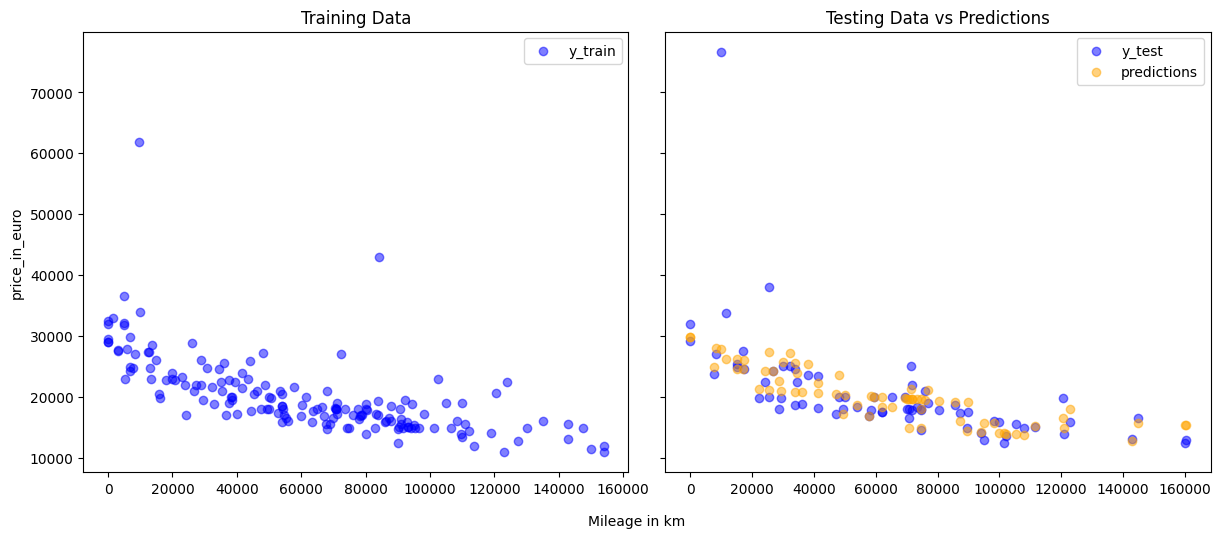

In [ ]:
plot_results(X_train, y_train,X_test,y_test, predictions)

In [ ]:
#Random Forest Regression
(X_train, y_train,X_test,y_test, predictions) = predict((MinMaxScaler(), RandomForestRegressor(n_estimators=100)), car_data_ML)

Completed in 0.17 seconds
  Mean r2 value for all models is 0.63
  Mean mape value for all models is 9.8 %


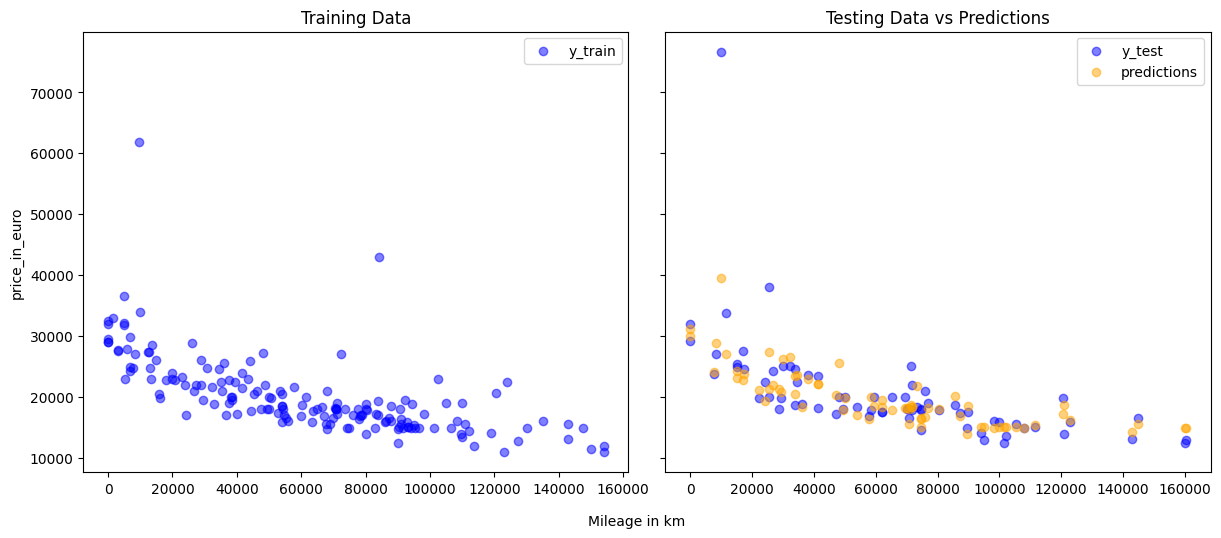

In [ ]:
plot_results(X_train, y_train,X_test,y_test, predictions)

In [ ]:
#Gradient Boost Regression
(X_train, y_train,X_test,y_test, predictions) = predict((MinMaxScaler(), GradientBoostingRegressor()), car_data_ML)

Completed in 0.09 seconds
  Mean r2 value for all models is 0.56
  Mean mape value for all models is 9.1 %


### Análise Descritiva

Vamos começar com a análise descritiva para entender as características dos nossos dados.

In [ ]:
# 1. Exibir estatísticas descritivas
display(car_data_ML[['price_in_euro', 'mileage_in_km', 'car_age']].describe())

,price_in_euro,mileage_in_km,car_age
count,236.000000,236.000000,236.000000
mean,20274.563559,61676.919492,6.877119
std,6994.845963,38404.087232,2.305808
min,10898.000000,10.000000,2.000000
25%,15996.750000,30637.250000,5.000000
50%,18444.000000,61633.500000,7.000000
75%,22834.000000,88409.000000,9.000000
max,76680.000000,160300.000000,10.000000


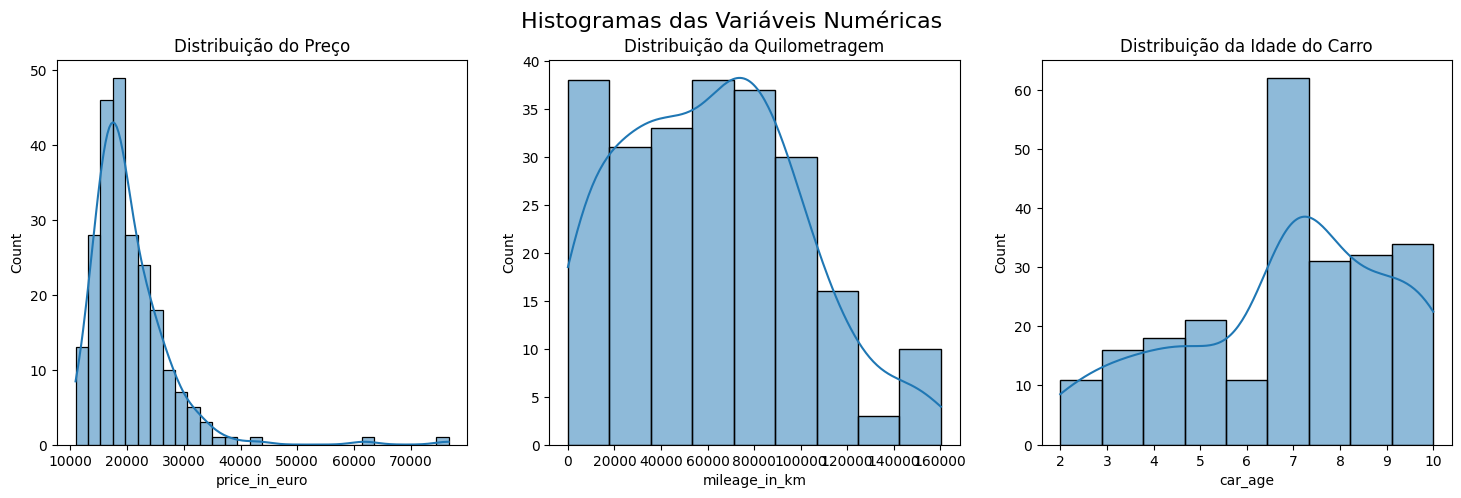

In [ ]:
# 2. Criar histogramas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Histogramas das Variáveis Numéricas', fontsize=16)

sns.histplot(car_data_ML['price_in_euro'], kde=True, ax=ax1)
ax1.set_title('Distribuição do Preço')

sns.histplot(car_data_ML['mileage_in_km'], kde=True, ax=ax2)
ax2.set_title('Distribuição da Quilometragem')

sns.histplot(car_data_ML['car_age'], kde=True, ax=ax3)
ax3.set_title('Distribuição da Idade do Carro')

plt.show()

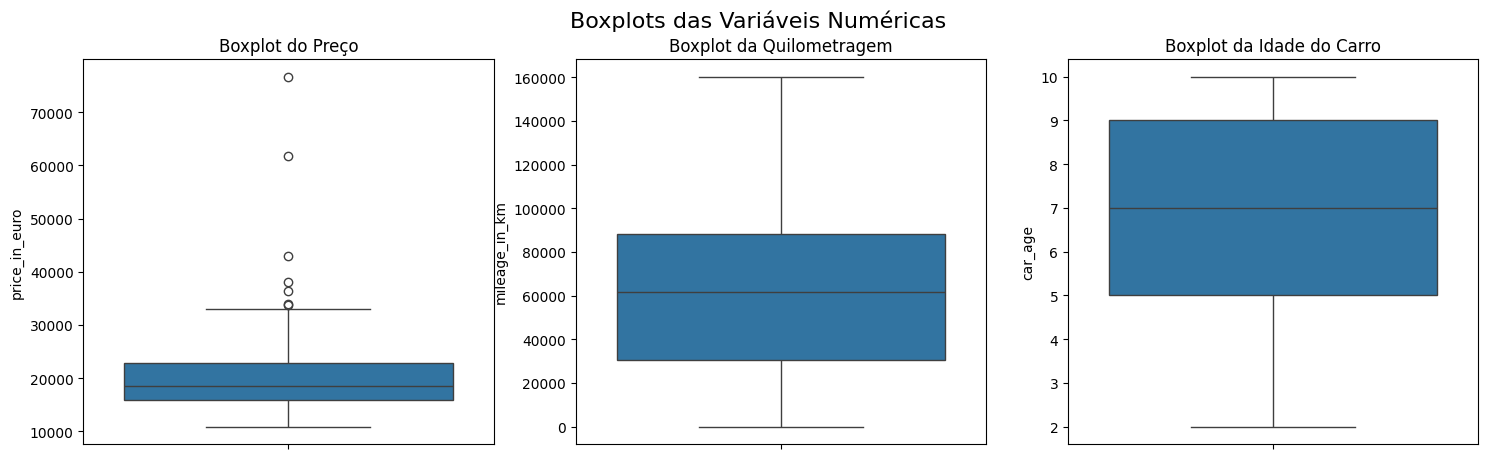

In [ ]:
# 3. Criar boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Boxplots das Variáveis Numéricas', fontsize=16)

sns.boxplot(y=car_data_ML['price_in_euro'], ax=ax1)
ax1.set_title('Boxplot do Preço')

sns.boxplot(y=car_data_ML['mileage_in_km'], ax=ax2)
ax2.set_title('Boxplot da Quilometragem')

sns.boxplot(y=car_data_ML['car_age'], ax=ax3)
ax3.set_title('Boxplot da Idade do Carro')

plt.show()

### Análise de Correlação

Agora, vamos analisar a correlação entre as variáveis para entender como elas se relacionam.

In [ ]:
# 1. Calcular a matriz de correlação
correlation_matrix = car_data_ML[['price_in_euro', 'mileage_in_km', 'car_age']].corr()

# 2. Exibir a matriz de correlação
display(correlation_matrix)

,price_in_euro,mileage_in_km,car_age
price_in_euro,1.000000,-0.635355,-0.714410
mileage_in_km,-0.635355,1.000000,0.797681
car_age,-0.714410,0.797681,1.000000


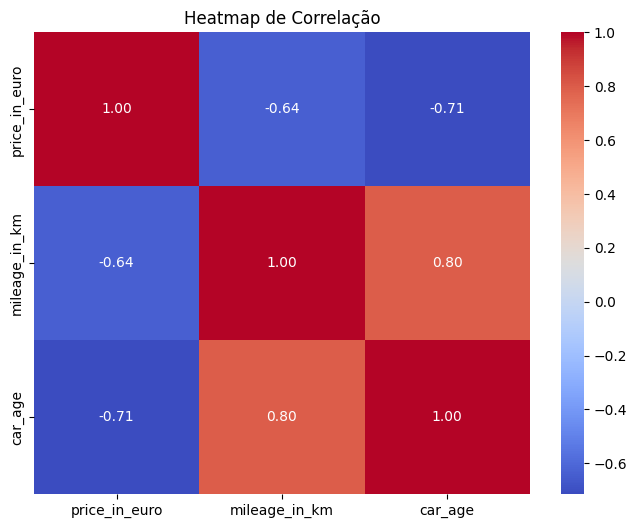

In [ ]:
# 3. Criar o heatmap


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

### Análise de Importância das Features

Vamos usar o `RandomForestRegressor` para descobrir quais features o modelo considera mais importantes para prever o preço.

In [ ]:
# 1. Preparar os dados (mesmo passo da função predict)
cat_feat = car_data_ML[['transmission_type', 'fuel_type']]
cont_feat = car_data_ML[['price_in_euro','power_ps', 'mileage_in_km', 'car_age']]
dummies = pd.get_dummies(cat_feat, drop_first=False)
car_data_ML_features = pd.concat([cont_feat, dummies], axis=1)
y = car_data_ML_features['price_in_euro'].values
X = car_data_ML_features.drop(columns=['price_in_euro'])

# 2. Treinar o modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# 3. Extrair e exibir a importância das features
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
display(feature_importances)

,0
car_age,0.532668
mileage_in_km,0.467332
power_ps,0.000000
transmission_type_Manual,0.000000
fuel_type_Petrol,0.000000


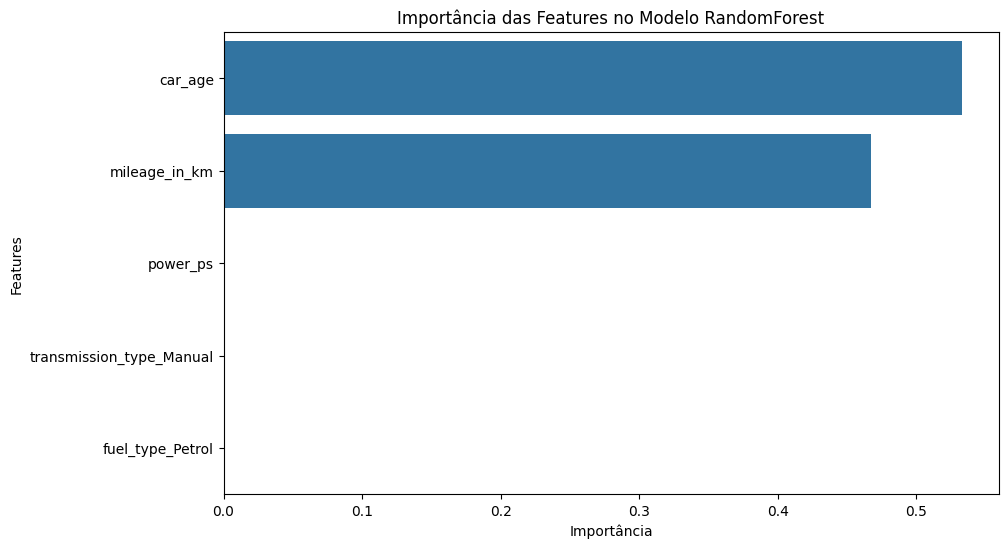

In [ ]:
# 4. Criar o gráfico de barras para visualizar a importância
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importância das Features no Modelo RandomForest')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()